In [12]:
import yaml
from pathlib import Path

def load_yaml(path):
    with Path(path).open('r') as f:
        data = yaml.safe_load(f)
    return data

In [83]:
import pygal
from string import capwords

CHART_FROM_NAME_STR = {
    "Line" : pygal.Line,
    "StackedLine": pygal.StackedLine
}

CHART_TYPE = 'chart_type'
DATA = 'data'

def validate_data(data):
    if not(CHART_TYPE in data):
        raise KeyError(f'"{CHART_TYPE}" must be specified')
    if not(data[CHART_TYPE] in CHART_FROM_NAME_STR):
        raise ValueError(f'Invalid chart_type: "{data[CHART_TYPE]}"')
    if not(DATA in data):
        raise KeyError('"data" MUST be specified')

        
def line_chart(data):
    
    validate_data(data)
    

    init_chart = CHART_FROM_NAME_STR[data['chart_type']]
    line_chart = init_chart(title   = data.get('title', ''),
                            x_title = data.get('x_title',''),
                            y_title = data.get('y_title',''),
                            interpolate = data.get('interpolate', None),
                            x_label_rotation=data.get('x_label_rotation', 0),
                            y_label_rotation=data.get('y_label_rotation', 0),
                            stroke = data.get('stroke', True),
                            dots = data.get('dots', True),
                            dot_size = data.get('dot_size', 1),
                            fill = data.get('fill', False),
                            zero = data.get('zero', 0),
                            human_readable = True,
                           )
    
    def default_x_labels(data):
        x_count = 0
        for run, values in data['data'].items():
            line_chart.add(run, values)
            if len(values) > x_count:
                x_count = len(values)
        return range(x_count)

    line_chart.x_labels = data.get('x_labels',\
                                   default_x_labels(data))
    line_chart.y_labels = data.get('y_labels', [])

    return line_chart

In [96]:
path = Path('..') / 'examples' / 'lines-01.yaml'
!cat {path}

chart_type: StackedLine # Required (line | .. todo)
title: Train Accuracy  # Default ''

# Draw the line (True), Only draw a dot (False)
stroke: True     # Default True

dots: False     # Default True

dot_size: 2     # Default 1 I think

# Fill below line
fill: True       # Default False  # Does not work with multiple lines

# Set reference line to fill too
zero: 0.3            # Default 0

x_title: Epoch    # Default ''
y_title: Accuracy # Defaule ''

x_labels: [a,b,c,d,e,f,g] # Default 1,2,3 ..

#y_labels: [a,b,c,d,e,f,g,h,i] # Default Infer from data

# 0 is horazontal, - is cw, + ccw
x_label_rotation: 20  # Default 0
y_label_rotation: 0   # Default 0

# Valid values: (cubic|quadratic|lagrange|trigonometric|hermite)
interpolate: cubic # Default None (linear)

style: ~ # TODO: http://www.pygal.org/en/stable/documentation/configuration/rendering.html#style 
data:
    run-01:
        - 0.1959999918937683
        - 0.1069999814033508
        - 0.1539999723434448
        - 0.18899999856

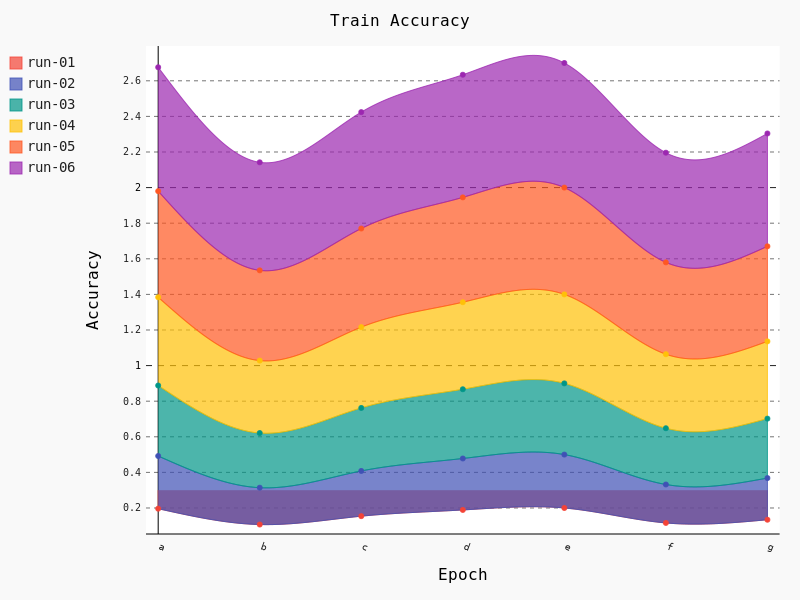

In [97]:
data = load_yaml(path)
line_chart(data)

In [94]:
path = Path('..') / 'examples' / 'lines-02.yaml'
!cat {path}

chart_type: line
title: Validation Metrics
x_title: Dataset
y_title: Value
x_labels:
    - baseline
    - 1k samples
    - 10k samples
    - 20k samples
    - 100k samples
    - 100k samples + QA
#y_labels: [a,b,c,d,e,f,g,h,i]

x_label_rotation: -20
#y_label_rotation: 0

# Valid values: cubic, quadratic, lagrange, trigonometric, hermite
# or ommit from yaml
# See: http://www.pygal.org/en/stable/documentation/configuration/interpolations.html
#interpolate: cubic
data:
    loss:
        - 0.6
        - 0.5
        - 0.4
        - 0.3
        - 0.2
        - 0.1
    acc:
        - 0.1
        - 0.2
        - 0.3
        - 0.4
        - 0.5
        - 0.6


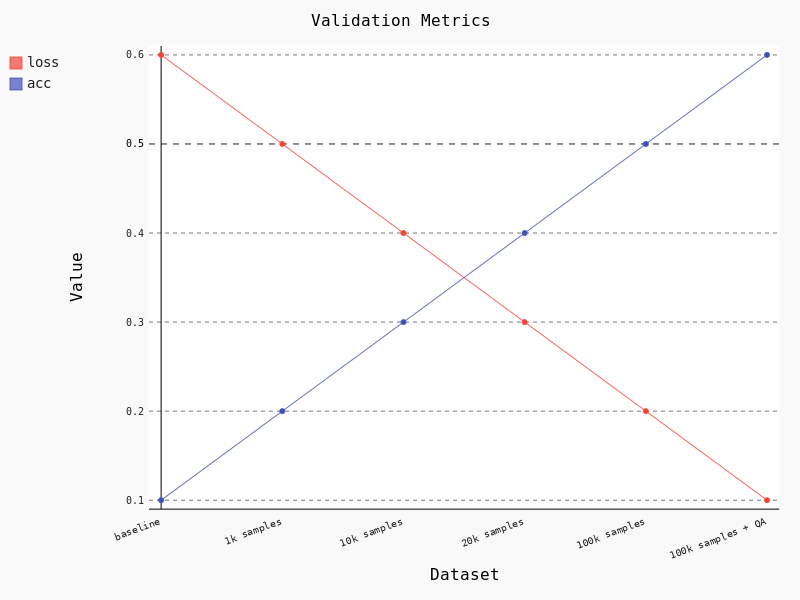

In [59]:
data = load_yaml(path)
line_chart(data)

In [45]:
path

'test/train-acc.yaml'

![shield](https://img.shields.io/badge/coverage-80%25-yellowgreen)